In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
hours = [50, 80, 110, 120, 140, 160]
passed = [0, 0, 1, 0, 1, 1]
df = pd.DataFrame({'hours': hours, 'passed': passed})

In [12]:
df

,hours,passed
0,50,0
1,80,0
2,110,1
3,120,0
4,140,1
5,160,1


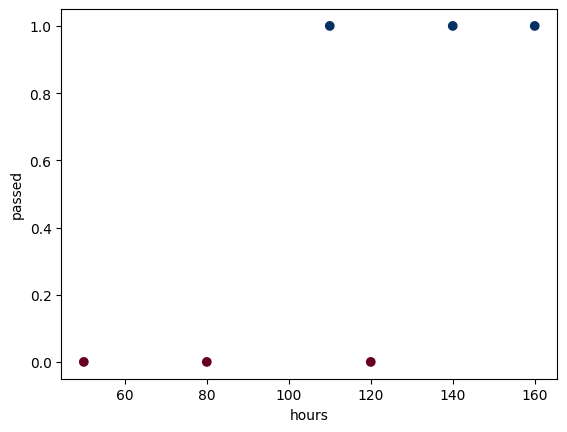

In [36]:
# plot df with passed 0 as red and 1 as white
plt.scatter(df.hours, df.passed, c=df.passed, cmap='RdBu')
plt.xlabel('hours')
plt.ylabel('passed')
plt.show()


In [38]:
def f(x, w, b):
    return 1/(1+np.exp(-(w*x+b)))

In [39]:
def loss(X, Y, w, b):
    return np.mean((f(X, w, b)-Y)**2)

In [69]:
def gradient(X, Y, w, b):
    dw, db = 0, 0
    for x, y in zip(X, Y):
        dw += (f(x, w, b)-y)*f(x, w, b)*(1-f(x, w, b))*x
        db += (f(x, w, b)-y)*f(x, w, b)*(1-f(x, w, b))

    return dw/len(X), db/len(X)

In [70]:
def train(X, Y, epochs=1000, lr=0.01):
    w, b = 0, 0
    for i in range(epochs):
        dw, db = gradient(X, Y, w, b)
        w -= lr*dw
        b -= lr*db

        if i%100 == 0:
            print(f"Epoch: {i}, Loss: {loss(X, Y, w, b)}, Values: {w}, {b}")

    return w, b

In [98]:
w, b = train(df.hours, df.passed, epochs=100000, lr=0.01)

Epoch: 0, Loss: 0.4244776701701507, Values: 0.03333333333333333, 0.0
Epoch: 100, Loss: 0.44763711749751406, Values: 0.040410192135244, -0.01468361719562819
Epoch: 200, Loss: 0.4545256364025256, Values: 0.043296819234222336, -0.028916405756997634
Epoch: 300, Loss: 0.4260920937600792, Values: 0.03439742607396411, -0.043067451947970556
Epoch: 400, Loss: 0.4815664146411074, Values: -0.02674967437601009, -0.05795153897731569
Epoch: 500, Loss: 0.3369202212017301, Values: -0.007448678015043711, -0.0722661422989624
Epoch: 600, Loss: 0.4521050159515636, Values: -0.019038824696043805, -0.08682003874319183
Epoch: 700, Loss: 0.47370646244308046, Values: 0.05495370735639809, -0.101176035489615
Epoch: 800, Loss: 0.48619190129082596, Values: -0.028682579709373244, -0.1155643985923238
Epoch: 900, Loss: 0.4567496562808066, Values: 0.04592338641299158, -0.12972608109586403
Epoch: 1000, Loss: 0.4528170763227972, Values: -0.018849263775878044, -0.14485265865350694
Epoch: 1100, Loss: 0.23440613855424153, V

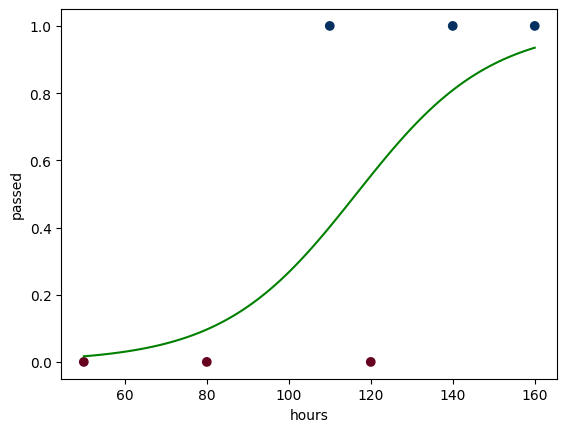

In [99]:
values = np.linspace(min(df.hours), max(df.hours), 100)
ypred = f(values, w, b)

plt.scatter(df.hours, df.passed, c=df.passed, cmap='RdBu')
plt.plot(values, ypred, c='green')
plt.xlabel('hours')
plt.ylabel('passed')
plt.show()